In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def valores_perdidos(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Porcentaje'])
    return missing_data

def estudio(df):
    print(df.head(5))
    # Estadísticas de los datos leídos
    print("El número de instancias del dataset: {}".format(df.shape[0]))
    print("El número de atributos del dataset: {}".format(df.shape[1]))
    # Valores perdidos
    missing_data = valores_perdidos(df)
    print('Valores perdidos:\n')
    print(missing_data[missing_data['Total'] > 0])
    

df = pd.read_excel('datos/default of credit card clients.xls',
                   skiprows = 1, index_col = 'ID')
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [2]:
print("El número de atributos actual es de: {}".format(df.shape[1]))
df.columns

El número de atributos actual es de: 24


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [3]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
for i in df['EDUCATION'].unique():
    print("\t {} instancias del valor {}".format(df['EDUCATION'].value_counts()[i],i))

	 14030 instancias del valor 2
	 10585 instancias del valor 1
	 4917 instancias del valor 3
	 280 instancias del valor 5
	 123 instancias del valor 4
	 51 instancias del valor 6
	 14 instancias del valor 0


In [5]:
df.replace({'EDUCATION': {0: 4, 5: 4, 6: 4}}, inplace = True)
for i in df['EDUCATION'].unique():
    print("\t {} instancias del valor {}".format(df['EDUCATION'].value_counts()[i],i))

	 14030 instancias del valor 2
	 10585 instancias del valor 1
	 4917 instancias del valor 3
	 468 instancias del valor 4


In [6]:
for i in df['MARRIAGE'].unique():
    print("\t {} instancias del valor {}".format(df['MARRIAGE'].value_counts()[i],i))

	 13659 instancias del valor 1
	 15964 instancias del valor 2
	 323 instancias del valor 3
	 54 instancias del valor 0


In [7]:
df.replace({'MARRIAGE': {0: 3}}, inplace = True)
for i in df['MARRIAGE'].unique():
    print("\t {} instancias del valor {}".format(df['MARRIAGE'].value_counts()[i],i))

	 13659 instancias del valor 1
	 15964 instancias del valor 2
	 377 instancias del valor 3


In [8]:
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [9]:
df.rename(columns={'SEX_1':'Hombre',
                        'SEX_2':'Mujer',
                        'EDUCATION_1':'Educacion_postgrado',
                        'EDUCATION_2':'Educacion_universidad',
                        'EDUCATION_3':'Educacion_secundaria',
                        'EDUCATION_4':'Educacion_otros',
                        'MARRIAGE_1':'Casado',
                        'MARRIAGE_2':'Soltero',
                        'MARRIAGE_3':'Otro_estado_civil'},
               inplace=True)

In [10]:
print("El número de atributos actual es de: {}".format(df.shape[1]))

El número de atributos actual es de: 30


In [11]:
for i in df['PAY_6'].unique():
    print("\t {} instancias {}".format(df['PAY_0'].value_counts()[i],i))

	 2759 instancias -2
	 2667 instancias 2
	 14737 instancias 0
	 5686 instancias -1
	 322 instancias 3
	 11 instancias 6
	 76 instancias 4
	 9 instancias 7
	 19 instancias 8
	 26 instancias 5


In [12]:
df

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default payment next month,Hombre,Mujer,Educacion_postgrado,Educacion_universidad,Educacion_secundaria,Educacion_otros,Casado,Soltero,Otro_estado_civil
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,1,0,1,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,1,0,1,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,1,0,1,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,1,0,1,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0,188948,192815,...,0,1,0,0,0,1,0,1,0,0
29997,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,1,0,0,0,1,0,0,1,0
29998,30000,37,4,3,2,-1,0,0,3565,3356,...,1,1,0,0,1,0,0,0,1,0


In [13]:
df = pd.get_dummies(df, columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'Hombre', 'Mujer', 'Educacion_postgrado', 'Educacion_universidad',
       'Educacion_secundaria', 'Educacion_otros', 'Casado', 'Soltero',
       'Otro_estado_civil', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1',
       'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7',
       'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
       'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', '

In [14]:
print("El número de atributos actual es de: {}".format(df.shape[1]))

El número de atributos actual es de: 88


In [15]:
df.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

In [16]:
for i in range (len(df['default payment next month'].unique())):
    total = df['default payment next month'].value_counts()[i]
    porcentaje = 100*total / df.shape[0]
    print("\t {} instancias de la clase {}, es decir, un {}% del total".format(total,i, porcentaje))

	 23364 instancias de la clase 0, es decir, un 77.88% del total
	 6636 instancias de la clase 1, es decir, un 22.12% del total


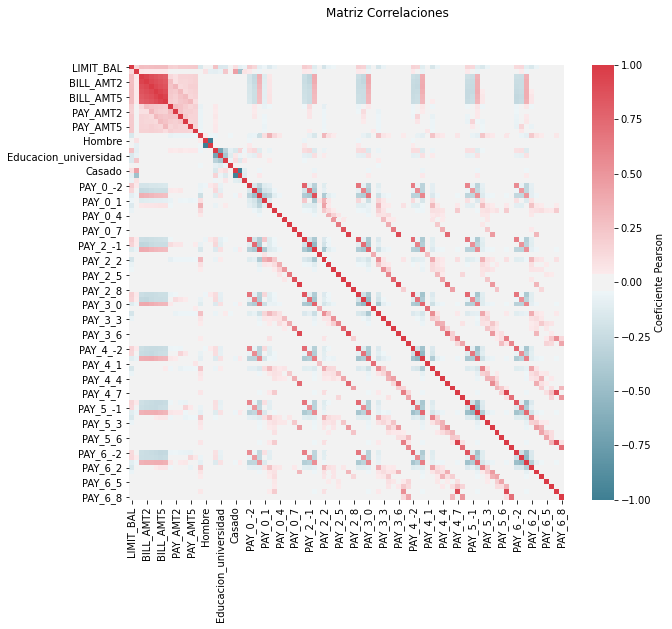

In [17]:
import seaborn as sns
def matriz_correlaciones(datos):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = datos.corr(method = 'pearson')
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax, cbar_kws={'label': 'Coeficiente Pearson'})
    f.suptitle('Matriz Correlaciones')
matriz_correlaciones(df)

In [18]:
# Seleccionamos las columnas que son multicolineales
def columnas_correladas(dataframe, coeficiente = 1):
    corr_matrix = dataframe.corr(method = 'pearson').abs() # Matriz de correlación en valor absoluto

    # Seleccionamos la matriz triangular superior de la matriz de correlación anterior
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Buscamos la columnas con una correlacion de 1 con alguna otra (cuando se da multicolinealidad)
    to_drop = [column for column in upper.columns if any(upper[column] >= coeficiente)]
    return to_drop
to_drop = columnas_correladas(dataframe = df, coeficiente = 1)

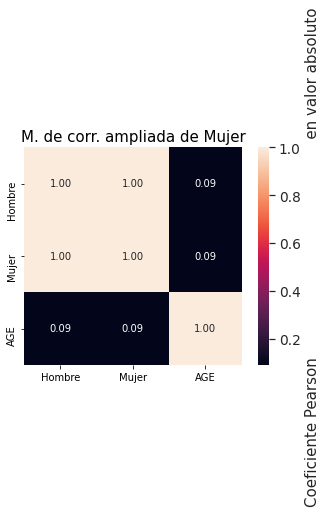

In [19]:
# Matriz de correlación en valor absoluto ampliada por columnas
def matriz_correlacion_ampliada(dataframe, columnas, k = 3):
# k: Número de variables a mostrar.
    # Matriz de correlación en valor absoluto
    corr_matrix = dataframe.corr(method = 'pearson').abs() 
    for i in columnas:
        cols = corr_matrix.nlargest(k, i)[i].index
        cm = np.abs(np.corrcoef(dataframe[cols].values.T))
        ax = plt.axes()
        sns.set(font_scale = 1.25)
        hm = sns.heatmap(cm, cbar = True, annot = True, square = True, 
                             fmt = '.2f', annot_kws = {'size': 10}, 
                             yticklabels = cols.values, 
                             xticklabels = cols.values, 
                             cbar_kws={'label': 'Coeficiente Pearson \
                                             en valor absoluto'})
        ax.set_title('M. de corr. ampliada de {}'.format(i))
        plt.show()
matriz_correlacion_ampliada(dataframe = df, k = 3, columnas = to_drop)

In [20]:
df.drop(['Hombre'], axis=1, inplace = True)

In [21]:
print("El número de atributos actual es de: {}".format(df.shape[1]))

El número de atributos actual es de: 87


In [22]:
# Separamos el dataset original en atributos y etiquetas:
X = df.iloc[:,:-1] # Todas las columnas menos la última
y = df.iloc[:, -1] # Última columna
y_df = pd.DataFrame(data=y)

In [23]:
# Dividimos los conjuntos en test (20 %) y train (80 %)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 

# Estadísticas de los datos leídos
n_train = X_train.shape[0]
n_test = X_test.shape[0]
porcentaje_train = 100*n_train/(n_test+n_train)
porcentaje_test = 100*n_test/(n_test+n_train)
print("El número de instancias de entrenamiento es de: {}".format(X_train.shape[0]))
print("El número de instancias de test es de: {}".format(X_test.shape[0]))
print("Porcentaje de train: {} y porcentaje de test: {}".format(
    porcentaje_train, porcentaje_test))

El número de instancias de entrenamiento es de: 24000
El número de instancias de test es de: 6000
Porcentaje de train: 80.0 y porcentaje de test: 20.0


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

preprocesado = [("escalado", MinMaxScaler())]

preprocesador = Pipeline(preprocesado)
preprocesador

datos_preprocesados = preprocesador.fit_transform(X_train)
datos_preprocesados

array([[0.01010101, 0.15517241, 0.16433013, ..., 0.        , 0.        ,
        0.        ],
       [0.04040404, 0.18965517, 0.1467988 , ..., 0.        , 0.        ,
        0.        ],
       [0.17171717, 0.25862069, 0.14651917, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04040404, 0.01724138, 0.19036609, ..., 0.        , 0.        ,
        0.        ],
       [0.07070707, 0.24137931, 0.15358763, ..., 0.        , 0.        ,
        0.        ],
       [0.29292929, 0.27586207, 0.14918799, ..., 0.        , 0.        ,
        0.        ]])

In [32]:
# Definimos el clasificador
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

svc = LinearSVC(penalty='l2', # Regularización Ridge (L2)
                                    loss = 'hinge')

                                    
svc.fit(datos_preprocesados, y_train)
print(svc.score(datos_preprocesados, y_train))
svc.predict(X_test)
print(svc.score(X_test, y_test))


1.0
0.9995


In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l2', # Regularización Ridge (L2)
                                    solver = 'lbfgs', # Algoritmo a utilizar en el problema de optimización, aunque es 
                                                            # el dado por defecto
                                    max_iter = 1000)

log.fit(datos_preprocesados, y_train)
print(log.score(datos_preprocesados, y_train))
log.predict(X_test)
print(log.score(X_test, y_test))

0.9999166666666667
0.9963333333333333


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(datos_preprocesados, y_train)
print(rf.score(datos_preprocesados, y_train))
rf.predict(X_test)
print(rf.score(X_test, y_test))

1.0
1.0


In [ ]:
sklearn.svm